In [1]:
import torch
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import quadratic_spline

In [1]:
n_ch = 2
n_knots = 21
knots_range = 1


In [3]:
qs = quadratic_spline.quadratic_spline(n_ch, n_knots, knots_range)

qs.coefficients.normal_(0,1)

grid step  0.10000000149011612


tensor([[-0.0147, -0.1864,  1.1667, -1.5488, -0.3811, -0.4884,  0.8399,  1.2738,
          0.8430, -1.7177, -0.1432,  0.3965, -0.1524, -0.1428,  1.4943,  0.1980,
         -1.5659, -1.1415, -0.6562, -1.0046,  0.9784],
        [-0.5145,  0.9603, -1.8324, -0.6073,  0.7055, -0.6679,  0.3605,  0.5749,
         -1.2142, -0.9706,  0.9957, -2.1302, -1.8031, -0.6643, -0.5635, -1.2871,
          0.5940,  1.3357, -0.3874,  2.1896, -0.3639]])

Text(0.5, 1.0, 'Difference')

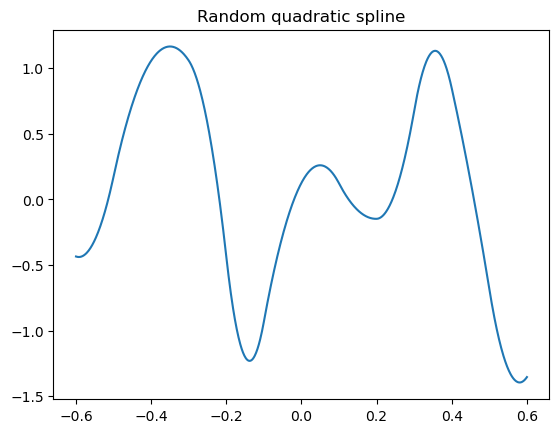

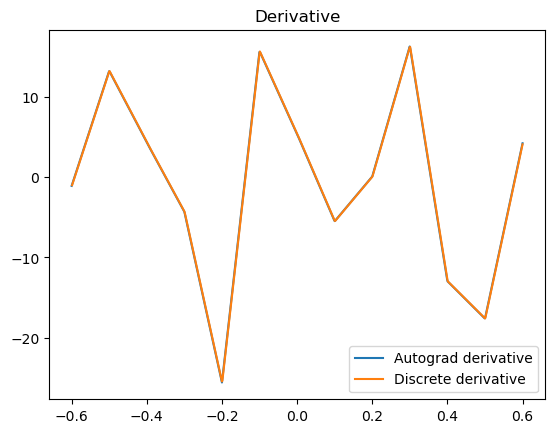

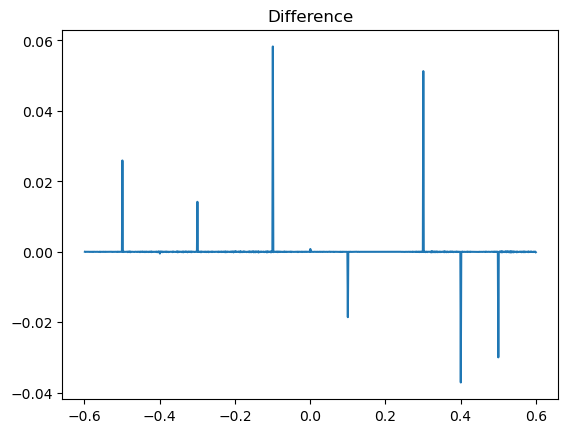

In [4]:
xmin = -0.6
xmax = 0.6
x = torch.linspace(xmin ,xmax,1000).view(-1, 1, 1, 1).expand(-1, n_ch, -1, -1)
x.requires_grad = True
y = qs(x)

plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), y[:, 0, 0, 0].detach().numpy())
plt.title('Random quadratic spline')

dydx = torch.autograd.grad(y.sum(), x, create_graph=False)[0]
plt.figure()
plt.plot(x[:, 0, 0, 0].detach().numpy(), dydx[:, 0, 0, 0].detach().numpy(), label='Autograd derivative')
plt.title('Derivative')


dydx_discrete = y[:, 0, 0, 0].diff() / x[:, 0, 0, 0].diff()

plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy(), label='Discrete derivative')

plt.legend()

plt.figure()
plt.plot(x[1:, 0, 0, 0].detach().numpy(), dydx_discrete.detach().numpy() - 0.5*(dydx[:-1, 0, 0, 0].detach().numpy() + dydx[1:, 0, 0, 0].detach().numpy()))
plt.title('Difference')